# Classify Yelp Reviews using NLP and Naive Bayes

# Problem Statement

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 

# STEP 1: Import Libraries/Dataset

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
yelp_df = pd.read_csv('yelp.csv')

# STEP 2: Dataset Visualization

In [0]:
# To get the length of the messages
yelp_df['length'] = yelp_df['text'].apply(len)

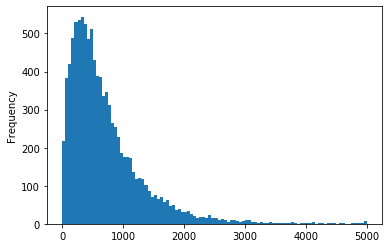

In [26]:
yelp_df['length'].plot(bins = 100, kind = 'hist')

In [27]:
# To see the longest message
yelp_df[yelp_df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [28]:
# To see the shortest message
yelp_df[yelp_df['length'] == 1]['text'].iloc[0]

'X'

In [29]:
# To see the mean message
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

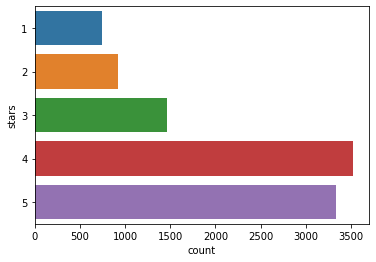

In [30]:
sns.countplot(y = 'stars', data = yelp_df)

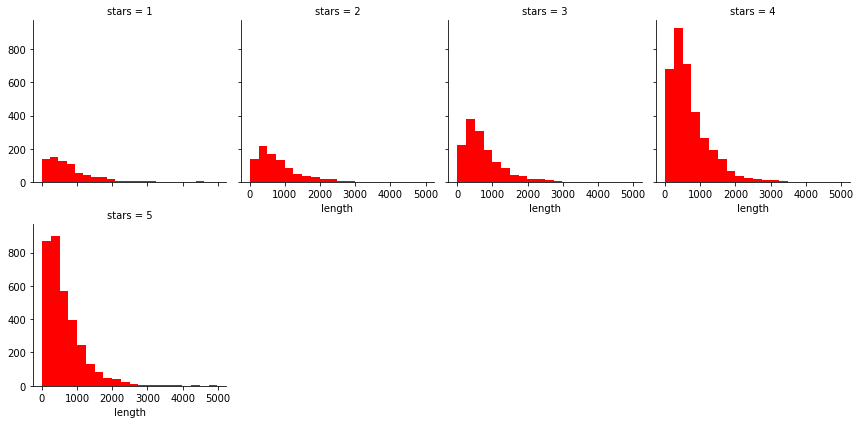

In [33]:
g = sns.FacetGrid(data = yelp_df, col = 'stars', col_wrap = 4)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [0]:
# Fetch the 1-star and 5-star reviews
yelp_df_1 = yelp_df[yelp_df['stars']==1]
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [0]:
# concat the reviews into a single dataset
yelp_df_1_5 = pd.concat([yelp_df_1,yelp_df_5])

In [8]:
print('1-Star percentage = ', (len(yelp_df_1)/len(yelp_df_1_5))*100, '%')

1-Star percentage =  18.330885952031327 %


In [9]:
print('5-Star percentage = ', (len(yelp_df_5)/len(yelp_df_1_5))*100, '%')

5-Star percentage =  81.66911404796868 %


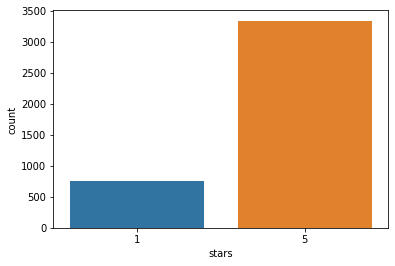

In [10]:
sns.countplot(yelp_df_1_5['stars'], label = 'Count')

# STEP 3: Data Cleansing

In [0]:
import string                      # To remove the punctuation
from nltk.corpus import stopwords  # To remove the stopwords

In [0]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
  text_punc_removed = [char for char in message if char not in string.punctuation]
  text_punc_removed_join = ''.join(text_punc_removed)
  text_punc_removed_join_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return text_punc_removed_join_clean

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [18]:
print(vectorizer.get_feature_names())

['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

In [19]:
yelp_countvectorizer.shape

(4086, 26435)

# STEP 4: Model Training

In [0]:
X = yelp_countvectorizer
y = yelp_df_1_5['stars'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# STEP 5: Model Evaluation

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

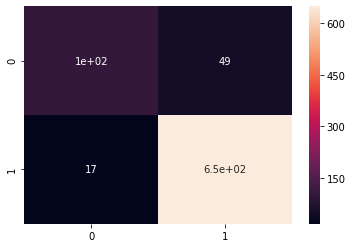

In [23]:
y_pred = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.68      0.76       152
           5       0.93      0.97      0.95       666

    accuracy                           0.92       818
   macro avg       0.89      0.83      0.85       818
weighted avg       0.92      0.92      0.92       818

